# Assignment 1

Karolina Chlopicka, 15716546
Shania Sinha, 14379031

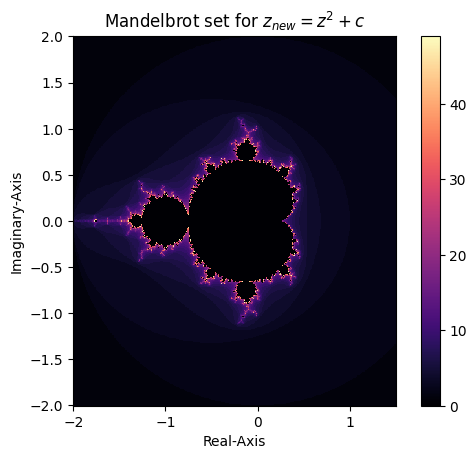

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# setting parameters (these values can be changed)
xDomain, yDomain = np.linspace(-2,1.5,500), np.linspace(-2,2,500)
bound = 2
power = 2             # any positive floating point value
max_iterations = 50   # any positive integer value
colormap = 'magma'    # set to any matplotlib valid colormap


# computing 2-d array to represent the mandelbrot-set
iterationArray = []
for y in yDomain:
    row = []
    for x in xDomain:
        c = complex(x,y)
        z = 0
        for iterationNumber in range(max_iterations):
            if(abs(z) >= bound):
                row.append(iterationNumber)
                break
            else: z = z**power + c
        else:
            row.append(0)

    iterationArray.append(row)

# plotting the data
ax = plt.axes()
#plt.rc('text', usetex = True)   # uncomment this line to enable use of tex when LaTeX is installed
ax.set_aspect('equal')
graph = ax.pcolormesh(xDomain, yDomain, iterationArray, cmap = colormap)
plt.colorbar(graph)
plt.xlabel("Real-Axis")
plt.ylabel("Imaginary-Axis")
plt.title('Mandelbrot set for $z_{{new}} = z^{{{}}} + c$'.format(power))
plt.show()

Investigating the area of the Mandelbrot set $A_M$ using Monte Carlo integration. $A_i,_s$ denotes an estimate of an area, where i refers to a number of iterations and s to a number of samples drawn.  

In [5]:

def check_mandelbrot(x,y):
    c = complex(x,y)
    z = 0
    for j in range(100):
        if(abs(z) >= bound):
            answer = 0
            break
        else: z = z**2 + c
    else:
        answer = 1
    return(answer)        

def monte_carlo(i,s):
    iterations = i #number of iterations
    sample_size = s #number of samples 
    size_iterations = np.zeros(iterations)

    for j in range(iterations):
        
        point_in = np.zeros(sample_size) #storing the points that are inside the Mandelbrot set
        point_out = np.zeros(sample_size) #storing the points that are outside Mandelbrot set
        
        for i in range(sample_size):
        #generating number of point equivalent to the sample size within the rectagle. X in (-2,1.5) and Y in (-2,2)
            x_cordinate = np.random.uniform(-2,1.5) 
            y_cordinate = np.random.uniform(-2,2)

            if(check_mandelbrot(x_cordinate,y_cordinate)==1):
                point_in[i] = 1
            
            else: 
                point_out[i] = 1

        size = (np.count_nonzero(point_in == 1)/sample_size)*(3.5*4)
        size_iterations[j] = size   
    average_size = np.mean(size_iterations)  
    #return (f"For {i} iternations and sample size equal to {s} $A_i_s$ = {average_size}")
    return(average_size)

In [6]:
monte_carlo(100,10000)

np.float64(1.545796)

Convergence of $A_i,_s$ $\rightarrow$ $A_M$. We set a sample size to $s=1000$, and investigate the convergence of the area when changing the number of iterations. 

In [7]:
number_of_iterations = np.array([100*i for i in range(1,31)])
estimation = np.zeros(len(number_of_iterations)) #array to store the results of estimated area 

for i in range(len(number_of_iterations)):   
    iterations = number_of_iterations[i]   
    estimation[i] = monte_carlo(iterations,1000)
print(estimation)  


KeyboardInterrupt: 

Text(0, 0.5, 'Difference in the estimated area: |A(i,1000) - A(3000,1000)|')

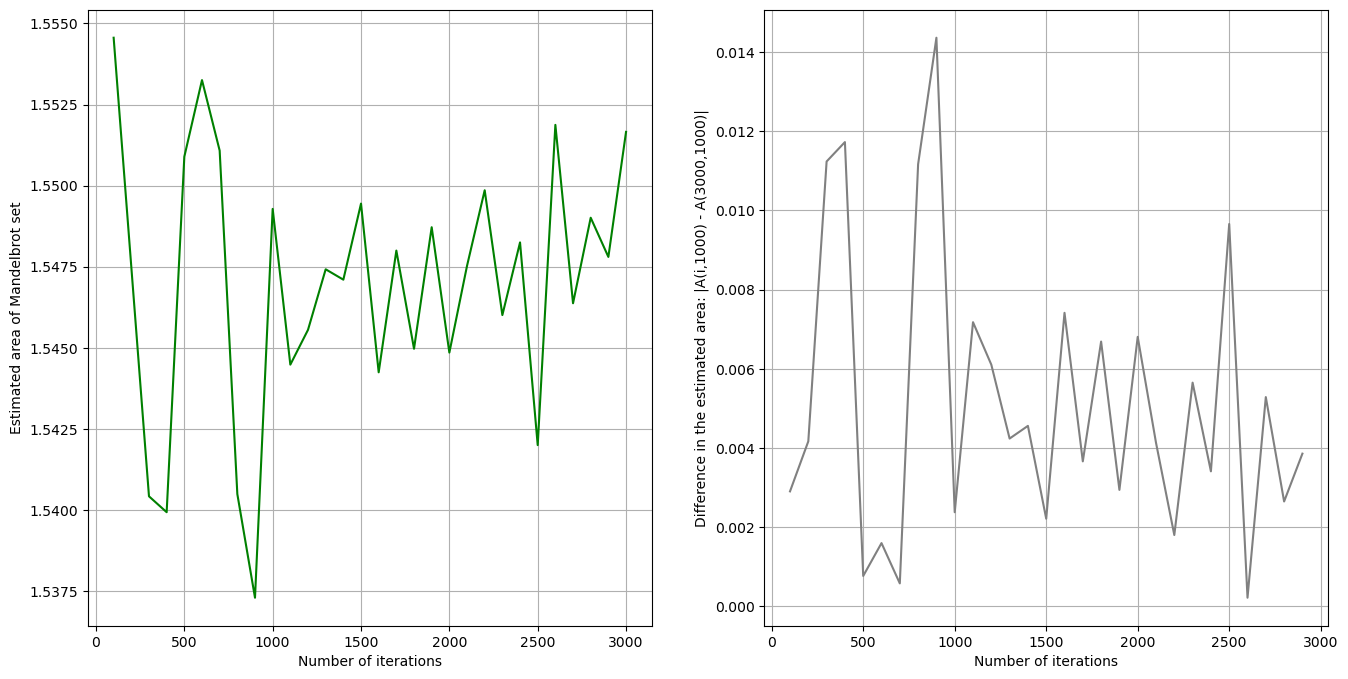

In [ ]:
figure_1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(number_of_iterations,estimation, color = "green")
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("Estimated area of Mandelbrot set")
ax1.grid(True)
ax2.grid(True)

max_i = estimation[-1]
difference = np.abs(estimation[0:-1] - max_i)
ax2.plot(number_of_iterations[0:-1],difference, color = "grey")
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("Difference in the estimated area: |A(i,1000) - A(3000,1000)|")



In [8]:
from pyDOE import lhs

def check_mandelbrot(x,y):
    c = complex(x,y)
    z = 0
    for j in range(100):
        if(abs(z) >= bound):
            answer = 0
            break
        else: z = z**2 + c
    else:
        answer = 1
    return(answer)        

def monte_carlo_hypercube(i, s):
    iterations = i  # Number of iterations
    sample_size = s  # Number of samples
    size_iterations = np.zeros(iterations)

    for j in range(iterations):
        # Generate Latin Hypercube samples within the defined range
        samples = lhs(2, samples=sample_size)
        
        # Transform samples to the domain of interest: X in (-2, 1.5) and Y in (-2, 2)
        x_coords = samples[:, 0] * (1.5 + 2) - 2  # Scale to (-2, 1.5)
        y_coords = samples[:, 1] * (2 + 2) - 2    # Scale to (-2, 2)
        
        point_in = np.zeros(sample_size)  # Points inside the Mandelbrot set

        for k in range(sample_size):
            if check_mandelbrot(x_coords[k], y_coords[k]) == 1:
                point_in[k] = 1

        # Calculate the estimated area for this iteration
        size = (np.count_nonzero(point_in == 1) / sample_size) * (3.5 * 4)
        size_iterations[j] = size

    average_size = np.mean(size_iterations)
    return average_size

In [10]:
monte_carlo_hypercube(100,10000)

np.float64(1.538474)

In [ ]:
import sobol_seq
import numpy as np

def monte_carlo_sobol(iterations, sample_size):
    # Array to store the area estimates for each iteration
    size_iterations = np.zeros(iterations)

    for j in range(iterations):
        # Generate Sobol samples in 2D space
        samples = sobol_seq.i4_sobol_generate(2, sample_size)
        
        # Transform samples to fit the domain: x in [-2, 1.5], y in [-2, 2]
        x_coords = samples[:, 0] * (1.5 + 2) - 2  # Scale to [-2, 1.5]
        y_coords = samples[:, 1] * (2 + 2) - 2    # Scale to [-2, 2]
        
        point_in = np.zeros(sample_size)  # Points inside the Mandelbrot set

        for k in range(sample_size):
            if check_mandelbrot(x_coords[k], y_coords[k]) == 1:
                point_in[k] = 1

        # Estimate the area for this iteration
        size = (np.count_nonzero(point_in == 1) / sample_size) * (3.5 * 4)
        size_iterations[j] = size

    # Return the average estimated area over all iterations
    average_size = np.mean(size_iterations)
    return average_size


In [12]:
number_of_iterations = np.array([100*i for i in range(1,31)])
estimation = np.zeros(len(number_of_iterations)) #array to store the results of estimated area 

for i in range(len(number_of_iterations)):   
    iterations = number_of_iterations[i]   
    estimation[i] = monte_carlo_hypercube(iterations,1000)
print(estimation)  


[1.53762    1.53811    1.55544667 1.54777    1.540924   1.55187667
 1.54604    1.5455825  1.54528889 1.544662   1.54563818 1.54617167
 1.54773231 1.54587    1.54374267 1.5434825  1.54484235 1.54668111
 1.55267368 1.547336   1.5498     1.54701273 1.54507043 1.54564667
 1.5474592  1.54478154 1.54467185 1.550525   1.54388621 1.54902533]


Text(0, 0.5, 'Difference in the estimated area: |A(i,1000) - A(3000,1000)|')

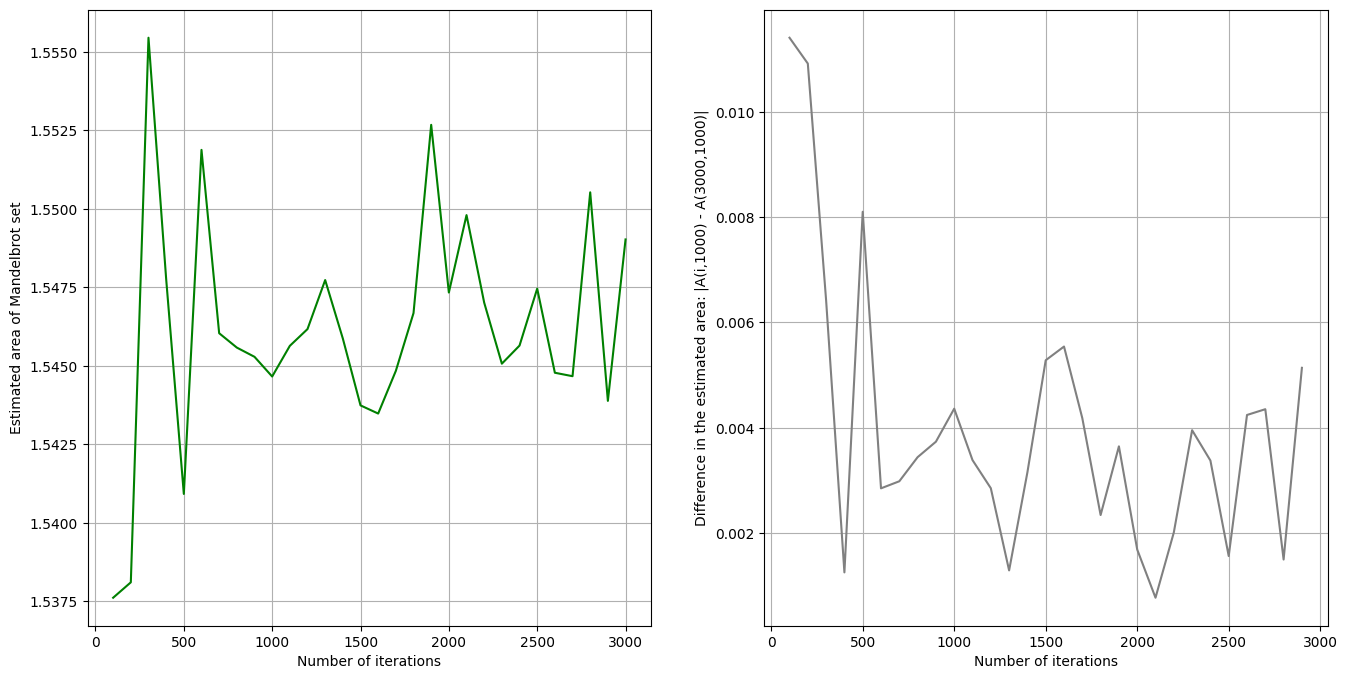

In [13]:
figure_1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.plot(number_of_iterations,estimation, color = "green")
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("Estimated area of Mandelbrot set")
ax1.grid(True)
ax2.grid(True)

max_i = estimation[-1]
difference = np.abs(estimation[0:-1] - max_i)
ax2.plot(number_of_iterations[0:-1],difference, color = "grey")
ax2.set_xlabel("Number of iterations")
ax2.set_ylabel("Difference in the estimated area: |A(i,1000) - A(3000,1000)|")



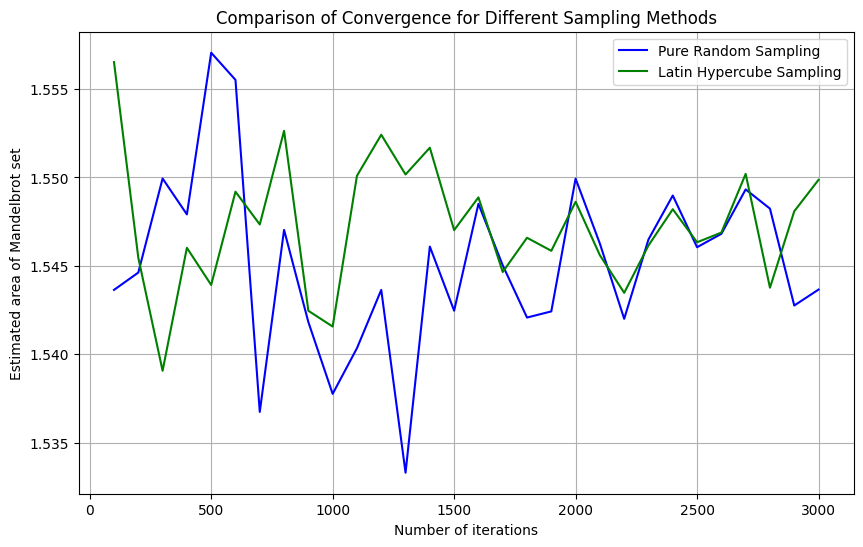

In [14]:
# Number of iterations to test
number_of_iterations = np.array([100 * i for i in range(1, 31)])

# Store results for each sampling method
estimation_random = np.zeros(len(number_of_iterations))
estimation_hypercube = np.zeros(len(number_of_iterations))
estimation_sobol = np.zeros(len(number_of_iterations))

for i in range(len(number_of_iterations)):
    iterations = number_of_iterations[i]
    estimation_random[i] = monte_carlo(iterations, 1000)  # Using pure random sampling
    estimation_hypercube[i] = monte_carlo_hypercube(iterations, 1000)  # Using LHS
    # estimation_sobol[i] = monte_carlo_sobol(iterations, 1000)  # Using Sobol sequence

# Plot the results to compare convergence
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(number_of_iterations, estimation_random, label="Pure Random Sampling", color="blue")
ax.plot(number_of_iterations, estimation_hypercube, label="Latin Hypercube Sampling", color="green")
# ax.plot(number_of_iterations, estimation_sobol, label="Sobol Sequence Sampling", color="orange")

ax.set_xlabel("Number of iterations")
ax.set_ylabel("Estimated area of Mandelbrot set")
ax.set_title("Comparison of Convergence for Different Sampling Methods")
ax.legend()
ax.grid(True)
plt.show()


In [15]:
def generate_trajectory(monte_carlo_method, num_iterations_list, sample_size):
    """
    Generates a convergence trajectory for a given Monte Carlo method.
    
    Parameters:
    - monte_carlo_method: A function that performs the Monte Carlo estimation for a single iteration.
                          It should accept two parameters: (iterations, sample_size).
    - num_iterations_list: A list of iteration counts for which to calculate the area estimate.
    - sample_size: Number of samples to use in each iteration.
    
    Returns:
    - A list containing the area estimates for each iteration count in num_iterations_list.
    """
    trajectory = []
    for iterations in num_iterations_list:
        area_estimate = monte_carlo_method(iterations, sample_size)
        trajectory.append(area_estimate)
    
    return trajectory

In [16]:
def plot_convergence(number_of_iterations, trajectory1, trajectory2, trajectory3, label1, label2, label3):
    """
    Plots the convergence trajectories of three different Monte Carlo methods.
    
    Parameters:
    - number_of_iterations: Array of iteration counts, representing the x-axis values.
    - trajectory1, trajectory2, trajectory3: Arrays or lists containing the area estimates for each method.
    - label1, label2, label3: Labels for each trajectory, representing the method names.
    """
    
    # Plot each trajectory with a distinct color and label
    plt.figure(figsize=(10, 6))
    plt.plot(number_of_iterations, trajectory1, label=label1, color="blue", linewidth=1.5)
    plt.plot(number_of_iterations, trajectory2, label=label2, color="green", linewidth=1.5)
    plt.plot(number_of_iterations, trajectory3, label=label3, color="orange", linewidth=1.5)
    
    # Adding title and labels
    plt.title("Convergence of Different Monte Carlo Methods")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Estimated Area of Mandelbrot Set")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()


In [20]:
number_of_iterations = [100 * i for i in range(1, 31)]  # For example, [100, 200, ..., 3000]
sample_size = 1000

trajectory_random = generate_trajectory(monte_carlo, number_of_iterations, sample_size)
trajectory_lhs = generate_trajectory(monte_carlo_hypercube, number_of_iterations, sample_size)
trajectory_sobol = generate_trajectory(monte_carlo_sobol, number_of_iterations, sample_size)
